# <center> Churn Prediction using Decision Tree </center>

___

Decision Tree converts a set of features and observations into a set of rules, resulting in a prediction. It gives a tree in which each node is a splitting feature that divides the observations into two or more branches with an objective of creating homogeneous subsets.

<img src="img/simple_DT_example.png" alt="http://intellspot.com/decision-tree-examples/" width="500" height="500">

The impurity of a split is measured commonly in two ways :
- GINI Index 
- Entropy

The splitting variable maximizes information gain (or minimizes impurity) which the difference between impurity before the split and after the split.

___

## Customer Churn Data

We will use [Customer Churn Dataset](https://www.kaggle.com/blastchar/telco-customer-churn). The data provides information about the customer services usage pattern. 

| Feature | Description |
| --- | --- |
| CustomerID | Customer ID |
| Gender | Customer gender (female, male) |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| Tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No) |

**The goal is to predict the chances of churn so that appropriate action can be taken to retain the customers.**

___

## Load the libraries

In [1]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
customer_churn = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
customer_churn.shape

(7043, 21)

There are a total of 7043 customers in the data set and 21 variables.

### Exploratory Data Analysis

In [4]:
customer_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Let us check if all columns are in appropriate data format.

In [5]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<div class="alert alert-block alert-info"><b> 
    
-  All objects types are categorical.
- TotalCharges should be float but pandas read it as object. This means there are some string type values.
</b></div>    

Let us write a small code to verify which string values are present in TotalCharges column. 

- We will run a loop to convert each value in the column to float.
- If the float conversion is unsuccessful that means the value is string and we will get a `ValueError`.
- We will use this error to find out the invalid values.

This can be accomplished by exception handling in Python using `try-catch-except` blocks.

In [6]:
data = customer_churn['TotalCharges']

for index in range(0, len(data)):
    try :
        skip = float(data[index])
    except ValueError:
        print(index, '---')       

488 ---
753 ---
936 ---
1082 ---
1340 ---
3331 ---
3826 ---
4380 ---
5218 ---
6670 ---
6754 ---


As we can see all these string values are spaces. Let us read the data again and instruct pandas to read space as NA. 

In [7]:
customer_churn = pd.read_csv('Telco-Customer-Churn.csv', na_values =" ")
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now, TotalCharges is correctly read as float.

<div class="alert alert-block alert-info"><b> 

- We will check if customerID is unique then we will convert it to row index.
</b></div>    

In [8]:
customer_churn.customerID.nunique()

7043

In [9]:
customer_churn.set_index('customerID', inplace = True)

customer_churn.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes

**Our target variable is a string, we will convert it to numeric code - 0 or 1.**

In [10]:
customer_churn.Churn = customer_churn.Churn.astype('category').cat.codes

In [11]:
customer_churn.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges  Churn  
customerID                                       
7590-VHVEG           29.85         29.85      0  
5575-GNVDE           56.95       1889.50      0  
3668-QPYBK           53.85        108.15      1  
7795-CFOCW           42.30       1840.75      0  
9237-HQITU           70.70        151.65      1

In [12]:
customer_churn.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Let us seperate our numerical and categorical attributes.

In [13]:
# create a list for all categorical column names

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'Contract', 'PaperlessBilling', 'PaymentMethod']

cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [14]:
# create a list for all numerical column names

num_cols = customer_churn.columns[~customer_churn.columns.isin(cat_cols)]

num_cols


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [15]:
# remove target column

num_cols = num_cols.delete(-1)

num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

We shall check there are no invalid values in any of the categorical variables.

In [16]:

for x in cat_cols :
    
    print(x, '------->', customer_churn[x].unique(), '\n')

gender -------> ['Female' 'Male'] 

SeniorCitizen -------> [0 1] 

Partner -------> ['Yes' 'No'] 

Dependents -------> ['No' 'Yes'] 

PhoneService -------> ['No' 'Yes'] 

MultipleLines -------> ['No phone service' 'No' 'Yes'] 

InternetService -------> ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity -------> ['No' 'Yes' 'No internet service'] 

OnlineBackup -------> ['Yes' 'No' 'No internet service'] 

DeviceProtection -------> ['No' 'Yes' 'No internet service'] 

TechSupport -------> ['No' 'Yes' 'No internet service'] 

StreamingTV -------> ['No' 'Yes' 'No internet service'] 

StreamingMovies -------> ['No' 'Yes' 'No internet service'] 

Contract -------> ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling -------> ['Yes' 'No'] 

PaymentMethod -------> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



Let us see if there is any invalid values in numerical columns

In [17]:
customer_churn[num_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

The data looks clean.

Let us check for number of NA values.

In [18]:
 customer_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As there are only 11 NA values, we can impute these with the mean. We will do these steps in the preprocess function later.

We will seperate our independent variables and target variable.

In [19]:

# independent variables

X = customer_churn.drop('Churn', axis = 1)


In [20]:

# dependent variable

y = customer_churn['Churn']



### Function to prepare data

We will write a function to prepare data for following functions.

- Train and Test Split

- Fit the Imputer on Train Data

As Decision Tree is not impacted by standardisation and 
the numerical variables are also of similar scale, we will not do standardisation.


In [21]:

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer()


In [22]:
def prepare_data(X, y, split_size = 0.3) :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_size)
    
    num_imputer.fit(X_train[num_cols])

    print(X_train.shape)
    print(X_test.shape)

    return X_train, X_test, y_train, y_test 
    

In [23]:
X_train, X_test, y_train, y_test = prepare_data(X,y)

(4930, 19)
(2113, 19)



### Function to pre-process data

We will write a function to pre-process data for following functions. 

This function will be called to transform both train and test datasets.

- Impute the numerical features

- Dummify the categorical features


In [24]:
def preprocess_data(data) :
    
    # impute numerical features
    
    data[num_cols] = num_imputer.transform(data[num_cols])
    
   # dummify categorical features

    data = pd.get_dummies(data, drop_first = True)
    
    return data

In [25]:
data.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [26]:
data.isnull().sum()

0

Call the pre-process function for both train and test data.

In [27]:

X_train = preprocess_data(X_train)

X_train.head()


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
customerID                                                                     
1291-CUOCY              0    72.0          110.60       7962.20            1   
0730-KOAVE              0    30.0           94.30       2679.70            1   
1349-WXNGG              0     1.0           20.05         20.05            1   
8548-AWOFC              0    66.0           63.85       4264.60            1   
5495-GPSRW              0    20.0           19.70        419.40            1   

            Partner_Yes  Dependents_Yes  PhoneService_Yes  \
customerID                                                  
1291-CUOCY            1               0                 1   
0730-KOAVE            0               0                 1   
1349-WXNGG            0               0                 1   
8548-AWOFC            1               0                 1   
5495-GPSRW            0               0                 1   

            MultipleLines_No phone service  MultipleLines_Yes  ...  \
customerID                                                     ...   
1291-CUOCY                               0                  1  ...   
0730-KOAVE                               0                  1  ...   
1349-WXNGG                               0                  0  ...   
8548-AWOFC                               0                  1  ...   
5495-GPSRW                               0                  0  ...   

            StreamingTV_No internet service  StreamingTV_Yes  \
customerID                                                     
1291-CUOCY                                0                1   
0730-KOAVE                                0                0   
1349-WXNGG                                1                0   
8548-AWOFC                                0                0   
5495-GPSRW                                1                0   

            StreamingMovies_No internet service  StreamingMovies_Yes  \
customerID                                                             
1291-CUOCY                                    0                    1   
0730-KOAVE                                    0                    1   
1349-WXNGG                                    1                    0   
8548-AWOFC                                    0                    1   
5495-GPSRW                                    1                    0   

            Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
customerID                                                               
1291-CUOCY                  0                  1                     1   
0730-KOAVE                  0                  0                     1   
1349-WXNGG                  0                  0                     0   
8548-AWOFC                  0                  0                     0   
5495-GPSRW                  0                  1                     1   

            PaymentMethod_Credit card (automatic)  \
customerID                                          
1291-CUOCY                                      1   
0730-KOAVE                                      1   
1349-WXNGG                                      0   
8548-AWOFC                                      0   
5495-GPSRW                                      0   

            PaymentMethod_Electronic check  PaymentMethod_Mailed check  
customerID                                                              
1291-CUOCY                               0                           0  
0730-KOAVE                               0                           0  
1349-WXNGG                               0                           0  
8548-AWOFC                               1                           0  
5495-GPSRW                               0                           1  

[5 rows x 30 columns]

In [28]:
X_train.dtypes

SeniorCitizen                              int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [29]:

X_test = preprocess_data(X_test)

X_test.head()


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
customerID                                                                     
0877-SDMBN              0    54.0          103.95       5639.05            0   
2955-PSXOE              0     1.0           20.20         20.20            0   
4376-KFVRS              0    72.0          114.05       8468.20            1   
0135-NMXAP              0    12.0           89.75       1052.40            0   
3415-TAILE              0     2.0           65.70        134.35            0   

            Partner_Yes  Dependents_Yes  PhoneService_Yes  \
customerID                                                  
0877-SDMBN            0               0                 1   
2955-PSXOE            0               0                 1   
4376-KFVRS            1               1                 1   
0135-NMXAP            0               0                 1   
3415-TAILE            1               1                 1   

            MultipleLines_No phone service  MultipleLines_Yes  ...  \
customerID                                                     ...   
0877-SDMBN                               0                  1  ...   
2955-PSXOE                               0                  0  ...   
4376-KFVRS                               0                  1  ...   
0135-NMXAP                               0                  1  ...   
3415-TAILE                               0                  0  ...   

            StreamingTV_No internet service  StreamingTV_Yes  \
customerID                                                     
0877-SDMBN                                0                1   
2955-PSXOE                                1                0   
4376-KFVRS                                0                1   
0135-NMXAP                                0                1   
3415-TAILE                                0                1   

            StreamingMovies_No internet service  StreamingMovies_Yes  \
customerID                                                             
0877-SDMBN                                    0                    1   
2955-PSXOE                                    1                    0   
4376-KFVRS                                    0                    1   
0135-NMXAP                                    0                    0   
3415-TAILE                                    0                    1   

            Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
customerID                                                               
0877-SDMBN                  1                  0                     1   
2955-PSXOE                  0                  0                     1   
4376-KFVRS                  0                  1                     1   
0135-NMXAP                  0                  0                     1   
3415-TAILE                  0                  0                     0   

            PaymentMethod_Credit card (automatic)  \
customerID                                          
0877-SDMBN                                      0   
2955-PSXOE                                      0   
4376-KFVRS                                      1   
0135-NMXAP                                      0   
3415-TAILE                                      0   

            PaymentMethod_Electronic check  PaymentMethod_Mailed check  
customerID                                                              
0877-SDMBN                               0                           0  
2955-PSXOE                               0                           0  
4376-KFVRS                               0                           0  
0135-NMXAP                               0                           0  
3415-TAILE                               0                           1  

[5 rows x 30 columns]

In [30]:
X_test.dtypes

SeniorCitizen                              int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

## Build Decsion Tree Model

___

### Function for Model Fit & Predict

We will write a function for following functions.

- Fit the model on train data

- Perform cross-validation when needed

- Predict on train and test data.


In [31]:
from sklearn.model_selection import GridSearchCV

def model_building(model, params = None, k = 1) :
    
    if params == None :
        model.fit(X_train, y_train)
        
        # return fitted model & train-test predictions
        
        return (model, model.predict(X_train), model.predict(X_test))
    
    else :
        
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        
        model_cv.fit(X_train, y_train)
        
        model = model_cv.best_estimator_
        
         # return and extra object for all cross validation operations
            
        return (model_cv, model, model.predict(X_train), model.predict(X.test))
        

Sklearn library provides a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function in its tree module. The same way we can also use `DecisionTreeRegressor`

In our first attempt, we will create a decision tree the default parameters.

Some important hyperparameters are

- criterion = ’gini’,
- max_depth = None,
- min_samples_split = 2,
- min_samples_leaf = 1,
- min_weight_fraction_leaf = 0.0,
- max_features = None,
- max_leaf_nodes = None,
- min_impurity_decrease = 0.0,
- min_impurity_split = None,
- class_weight = None


In [32]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

model, pred_train, pred_test = model_building(dtc)


### Feature Importance

In [33]:
model.feature_importances_

array([0.01583177, 0.21255837, 0.16790476, 0.21213751, 0.02826053,
       0.02761649, 0.01587427, 0.00259642, 0.00109154, 0.0141691 ,
       0.11296343, 0.01532779, 0.        , 0.01721738, 0.        ,
       0.0158004 , 0.        , 0.01503945, 0.        , 0.01453121,
       0.        , 0.00952504, 0.        , 0.00791219, 0.02032555,
       0.00750813, 0.01929632, 0.01042306, 0.02590942, 0.01017988])

In [34]:
importance = pd.DataFrame([model.feature_importances_], columns = X_train.columns)

importance.sort_values(by = 0, axis = 1, ascending = False, inplace = True)

importance

tenure  TotalCharges  MonthlyCharges  InternetService_Fiber optic  \
0  0.212558      0.212138        0.167905                     0.112963   

   gender_Male  Partner_Yes  PaymentMethod_Electronic check  \
0     0.028261     0.027616                        0.025909   

   Contract_One year  PaperlessBilling_Yes  OnlineSecurity_Yes  ...  \
0           0.020326              0.019296            0.017217  ...   

   StreamingMovies_Yes  Contract_Two year  PhoneService_Yes  \
0             0.007912           0.007508          0.002596   

   MultipleLines_No phone service  StreamingTV_No internet service  \
0                        0.001092                              0.0   

   OnlineBackup_No internet service  StreamingMovies_No internet service  \
0                               0.0                                  0.0   

   TechSupport_No internet service  DeviceProtection_No internet service  \
0                              0.0                                   0.0   

   OnlineSecurity_No internet service  
0                                 0.0  

[1 rows x 30 columns]

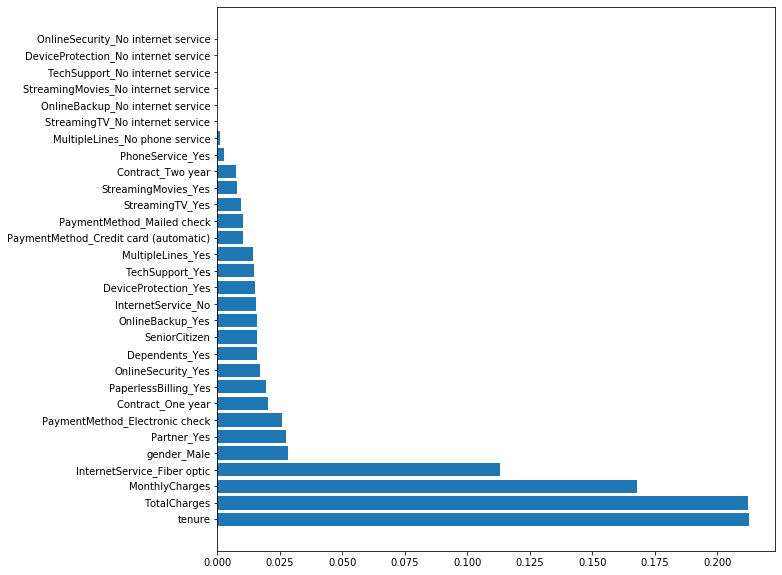

In [35]:

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10,10

plt.barh(importance.columns, importance.iloc[0].values)

plt.show()


### Function to Evaluate Model

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import classification_report

In [37]:
def model_evaluation(actuals, predictions) :
    
    print('\n Confusion Matrix : ')
    print(confusion_matrix(actuals, predictions))
    
    print ('\n Report : ')
    print (classification_report(actuals, predictions))
    
    print( '\n Accuracy score : ', accuracy_score(actuals,predictions))
    print("--------------------------------------------------------------")
    

In [38]:

model_evaluation(y_train, pred_train)

model_evaluation(y_test, pred_test)



 Confusion Matrix : 
[[3610    1]
 [   7 1312]]

 Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3611
           1       1.00      0.99      1.00      1319

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930


 Accuracy score :  0.9983772819472616
--------------------------------------------------------------

 Confusion Matrix : 
[[1268  295]
 [ 283  267]]

 Report : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1563
           1       0.48      0.49      0.48       550

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113


 Accuracy score :  0.7264552768575485
--------------------------------------------------------------


### Function to plot Decision Tree Model

In [39]:
import os 

os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

In [40]:
from sklearn.externals.six import StringIO  

from IPython.display import Image

from sklearn.tree import export_graphviz

import pydotplus


In [41]:
def plot_tree(tree, dataframe,label_col, plot_title) :
    
    label_names = pd.unique(dataframe[label_col])
    
    # obtaining plot data.
    
    graph_data = export_graphviz(tree, feature_names = dataframe.drop(label_col, axis = 1).columns,
                                class_names= label_names, filled = True, rounded = True, out_file = None)
    
    # Generating plot:
    
    graph =graphviz.Source(graph_data, filename="test.png", format="png")
    
    graph.render(plot_title)
    
    return graph
    

In [42]:
data = X_train

In [43]:
data["Churn"] = y_train.astype("str")

In [44]:
data.dtypes

SeniorCitizen                              int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [45]:
import graphviz
tree_graph = plot_tree(model, data ,'Churn', 'Tree')

tree_graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.546654 to fit


In [46]:
def plot_dt(model) :
    
    dot_data = StringIO()
    
    export_graphviz(model, out_file = dot_data, filled = True)
    
    return pydotplus.graph_from_dot_data(dot_data.getvalue()) 


In [47]:
Image(plot_dt(model).create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.71741 to fit



In [48]:
type(tree_graph)

graphviz.files.Source

In [49]:
tree_graph.render(filename = 'img/g1copy')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.546654 to fit


'img\\g1copy.png'

In [50]:
from sklearn.tree.export import export_text

In [51]:
X_train.drop(['Churn'], axis = 1, inplace = True) 

X_train.dtypes

SeniorCitizen                              int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [52]:
X_train.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [53]:
tree_rules = export_text(model, feature_names=list(X_train))

In [54]:
X_train.describe().T

count         mean          std  \
SeniorCitizen                          4930.0     0.154564     0.361525   
tenure                                 4930.0    32.595132    24.571358   
MonthlyCharges                         4930.0    64.909645    30.052358   
TotalCharges                           4930.0  2295.422536  2256.422106   
gender_Male                            4930.0     0.512982     0.499882   
Partner_Yes                            4930.0     0.485193     0.499831   
Dependents_Yes                         4930.0     0.301420     0.458921   
PhoneService_Yes                       4930.0     0.901826     0.297581   
MultipleLines_No phone service         4930.0     0.098174     0.297581   
MultipleLines_Yes                      4930.0     0.420892     0.493752   
InternetService_Fiber optic            4930.0     0.441176     0.496578   
InternetService_No                     4930.0     0.214604     0.410589   
OnlineSecurity_No internet service     4930.0     0.214604     0.410589   
OnlineSecurity_Yes                     4930.0     0.284990     0.451455   
OnlineBackup_No internet service       4930.0     0.214604     0.410589   
OnlineBackup_Yes                       4930.0     0.345233     0.475493   
DeviceProtection_No internet service   4930.0     0.214604     0.410589   
DeviceProtection_Yes                   4930.0     0.347059     0.476083   
TechSupport_No internet service        4930.0     0.214604     0.410589   
TechSupport_Yes                        4930.0     0.294523     0.455874   
StreamingTV_No internet service        4930.0     0.214604     0.410589   
StreamingTV_Yes                        4930.0     0.383570     0.486304   
StreamingMovies_No internet service    4930.0     0.214604     0.410589   
StreamingMovies_Yes                    4930.0     0.393509     0.488578   
Contract_One year                      4930.0     0.208114     0.406000   
Contract_Two year                      4930.0     0.244625     0.429908   
PaperlessBilling_Yes                   4930.0     0.587627     0.492312   
PaymentMethod_Credit card (automatic)  4930.0     0.216227     0.411713   
PaymentMethod_Electronic check         4930.0     0.334888     0.471999   
PaymentMethod_Mailed check             4930.0     0.228398     0.419843   

                                         min       25%       50%        75%  \
SeniorCitizen                           0.00    0.0000     0.000     0.0000   
tenure                                  0.00    9.0000    29.000    56.0000   
MonthlyCharges                         18.25   35.5625    70.500    90.0500   
TotalCharges                           18.80  415.1750  1422.575  3782.7125   
gender_Male                             0.00    0.0000     1.000     1.0000   
Partner_Yes                             0.00    0.0000     0.000     1.0000   
Dependents_Yes                          0.00    0.0000     0.000     1.0000   
PhoneService_Yes                        0.00    1.0000     1.000     1.0000   
MultipleLines_No phone service          0.00    0.0000     0.000     0.0000   
MultipleLines_Yes                       0.00    0.0000     0.000     1.0000   
InternetService_Fiber optic             0.00    0.0000     0.000     1.0000   
InternetService_No                      0.00    0.0000     0.000     0.0000   
OnlineSecurity_No internet service      0.00    0.0000     0.000     0.0000   
OnlineSecurity_Yes                      0.00    0.0000     0.000     1.0000   
OnlineBackup_No internet service        0.00    0.0000     0.000     0.0000   
OnlineBackup_Yes                        0.00    0.0000     0.000     1.0000   
DeviceProtection_No internet service    0.00    0.0000     0.000     0.0000   
DeviceProtection_Yes                    0.00    0.0000     0.000     1.0000   
TechSupport_No internet service         0.00    0.0000     0.000     0.0000   
TechSupport_Yes                         0.00    0.0000     0.000     1.0000   
StreamingTV_No internet service         0.00    0.0000 

In [55]:
tree_rules

'|--- tenure <= 16.50\n|   |--- InternetService_Fiber optic <= 0.50\n|   |   |--- InternetService_No <= 0.50\n|   |   |   |--- TotalCharges <= 223.60\n|   |   |   |   |--- PaymentMethod_Electronic check <= 0.50\n|   |   |   |   |   |--- MonthlyCharges <= 57.70\n|   |   |   |   |   |   |--- PaperlessBilling_Yes <= 0.50\n|   |   |   |   |   |   |   |--- MonthlyCharges <= 45.62\n|   |   |   |   |   |   |   |   |--- MonthlyCharges <= 44.70\n|   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 43.18\n|   |   |   |   |   |   |   |   |   |   |--- PaymentMethod_Mailed check <= 0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5\n|   |   |   |   |   |   |   |   |   |   |--- PaymentMethod_Mailed check >  0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5\n|   |   |   |   |   |   |   |   |   |--- MonthlyCharges >  43.18\n|   |   |   |   |   |   |   |   |   |   |--- PaymentMethod_Mailed check <= 0.50\n|   |   |   |   |   |   |   

In [56]:
# TREE RULES

from sklearn import datasets

iris = datasets.load_iris()

type(iris)


sklearn.utils.Bunch

In [57]:
features = list(X_train.columns)

In [58]:
from sklearn import tree

In [59]:
dotfile = open ("dt.dot", 'w')

tree.export_graphviz(model, out_file = dotfile, feature_names = features)

dotfile.close()


Based on the results, we can say that the model is overfitting as the train accuracy is much higher than the test accuracy. This is expected because the default parameters allow the tree to grow full depth.

Let us try some of the arguments for pruning the tree.

Based on the results, we can say that the model is overfitting as the train accuracy is much higher than the test accuracy. This is expected because the default parameters allow the tree to grow full depth.

Let us try some of the arguments for pruning the tree.

### Decision Tree Classifier with Hyper parameter of Max_Depth = 2

In [61]:
dtc_2 = DecisionTreeClassifier(max_depth = 2)

model_2, pred_train_2, pred_test_2 = model_building(dtc_2)

In [62]:
model_evaluation(y_train, pred_train_2)

model_evaluation(y_test, pred_test_2)


 Confusion Matrix : 
[[3381  230]
 [ 791  528]]

 Report : 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3611
           1       0.70      0.40      0.51      1319

    accuracy                           0.79      4930
   macro avg       0.75      0.67      0.69      4930
weighted avg       0.78      0.79      0.77      4930


 Accuracy score :  0.7929006085192698
--------------------------------------------------------------

 Confusion Matrix : 
[[1445  118]
 [ 338  212]]

 Report : 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1563
           1       0.64      0.39      0.48       550

    accuracy                           0.78      2113
   macro avg       0.73      0.65      0.67      2113
weighted avg       0.77      0.78      0.76      2113


 Accuracy score :  0.7841930903928065
--------------------------------------------------------------


In [63]:
y_train.value_counts()

0    3611
1    1319
Name: Churn, dtype: int64

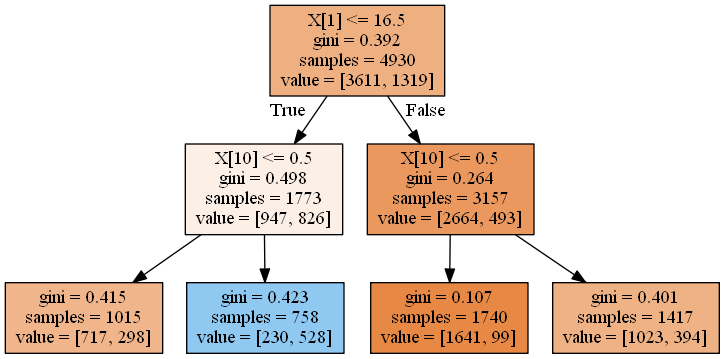

In [64]:
Image(plot_dt(model_2).create_png())

After adjusting for max_depth hyperparameter, our test accuracy has improved by a good margin.